In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Flatten,MaxPool2D,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout,Conv2D,Conv1D,Lambda
from keras.models import Model,load_model
from keras.optimizers import Adam
import keras.backend as K
from keras.constraints import max_norm
import h5py
import keras
import utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
feat_file='/content/gdrive/My Drive/EE5611_project_features/new_scrnn_features.h5'
model_dir = '/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/new_scrnn_models/'
fid=h5py.File(feat_file,'r');
x_tr = fid['x_tr']
y_tr = fid['y_tr']
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [0]:
def new_scrnn():

	# Dropout and regularization not added. Make modifications to add those layers
	# change the hyperparameter values as mentioned in the cited paper

	inputs = Input((128,4,))
	l = BatchNormalization()(inputs)
	# l = Lambda(lambda t: K.expand_dims(t, -2))(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	l = MaxPool1D(3)(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	# l = Lambda(lambda t: K.squeeze(t, -2))(l)
	l = LSTM(128,return_sequences=True,activation='tanh',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = LSTM(128,return_sequences=True,activation='tanh',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = Flatten()(l)
	outputs = Dense(11,activation='softmax',kernel_constraint = max_norm(2.))(l)

	model = Model(inputs,outputs)
	model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
	model.summary()
	return model

def baseline_scrnn_tanh():

	# Dropout and regularization not added. Make modifications to add those layers
	# change the hyperparameter values as mentioned in the cited paper

	inputs = Input((128,2,))
	l = BatchNormalization()(inputs)
	# l = Lambda(lambda t: K.expand_dims(t, -2))(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	l = MaxPool1D(3)(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	# l = Lambda(lambda t: K.squeeze(t, -2))(l)
	l = LSTM(128,return_sequences=True,activation='tanh',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = LSTM(128,return_sequences=True,activation='tanh',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = Flatten()(l)
	outputs = Dense(11,activation='softmax',kernel_constraint = max_norm(2.))(l)

	model = Model(inputs,outputs)
	model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
	model.summary()
	return model

In [5]:
m_new_scrnn = new_scrnn()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 4)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 4)            16        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 128)          2688      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 37, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 128)           0   

In [0]:
checkpoint = keras.callbacks.ModelCheckpoint(model_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [7]:
history = m_new_scrnn.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=400,
       epochs=50,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=1)

Train on 198000 samples, validate on 22000 samples
Epoch 1/50
198000/198000 [==============================] - 45s 228us/step - loss: 1.5570 - accuracy: 0.4071 - val_loss: 1.8778 - val_accuracy: 0.3222

Epoch 00001: saving model to /content/gdrive/My Drive/EE5611_project_features/SCRNN_models/new_scrnn_models/model_epoch-01_val_acc-0.32.h5
Epoch 2/50
198000/198000 [==============================] - 26s 130us/step - loss: 1.2653 - accuracy: 0.5088 - val_loss: 1.2161 - val_accuracy: 0.5311

Epoch 00002: saving model to /content/gdrive/My Drive/EE5611_project_features/SCRNN_models/new_scrnn_models/model_epoch-02_val_acc-0.53.h5
Epoch 3/50
198000/198000 [==============================] - 25s 127us/step - loss: 1.2115 - accuracy: 0.5322 - val_loss: 1.1874 - val_accuracy: 0.5421

Epoch 00003: saving model to /content/gdrive/My Drive/EE5611_project_features/SCRNN_models/new_scrnn_models/model_epoch-03_val_acc-0.54.h5
Epoch 4/50
198000/198000 [==============================] - 25s 125us/step -

new scrnn


acc_new_scrnn
 [0.40706566, 0.5087778, 0.5321768, 0.5450707, 0.5563081, 0.56231314, 0.56522727, 0.57018185, 0.5740101, 0.5797222, 0.58723736, 0.59329295, 0.60046464, 0.6064899, 0.611798, 0.61629796, 0.62211615, 0.62591916, 0.6306313, 0.63396466, 0.63954544, 0.6428788, 0.6471818, 0.651101, 0.6565202, 0.6618232, 0.6645505, 0.6693434, 0.6746717, 0.67758584, 0.6827828, 0.6867879, 0.6908838, 0.69538385, 0.6996414, 0.70328283, 0.70745456, 0.7111616, 0.71542424, 0.71853536, 0.7217626, 0.7251111, 0.7286313, 0.732197, 0.7361515, 0.73895454, 0.7430101, 0.74530303, 0.7485909, 0.7520808]
val_acc_new_scrnn
 [0.32222726941108704, 0.5311363339424133, 0.542090892791748, 0.5523181557655334, 0.5490454435348511, 0.5573182106018066, 0.5681818127632141, 0.5673636198043823, 0.5665909051895142, 0.5795000195503235, 0.5807726979255676, 0.5944545269012451, 0.5982727408409119, 0.5988636612892151, 0.6010909080505371, 0.6060000061988831, 0.6020908951759338, 0.6052272915840149, 0.6100909113883972, 0.606

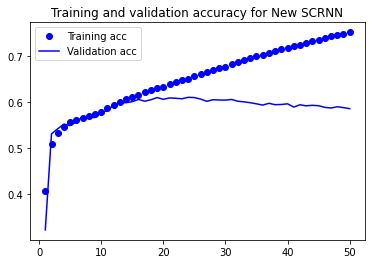

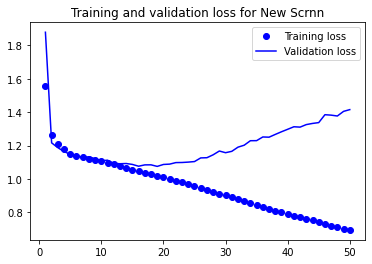

In [8]:
acc_new_scrnn = history.history['accuracy']
val_acc_new_scrnn = history.history['val_accuracy']
loss_new_scrnn = history.history['loss']
val_loss_new_scrnn = history.history['val_loss']
epochs = range(1, len(acc_new_scrnn) + 1)

print('===================================================')
print('new scrnn\n\n')
print('acc_new_scrnn\n',acc_new_scrnn)
print('val_acc_new_scrnn\n',val_acc_new_scrnn)
print('loss_new_scrnn\n',loss_new_scrnn)
print('val_loss_new_scrnn\n',val_loss_new_scrnn)


plt.plot(epochs, acc_new_scrnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_new_scrnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for New SCRNN')
plt.legend()
plt.figure()
plt.plot(epochs, loss_new_scrnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_new_scrnn, 'b', label='Validation loss')
plt.title('Training and validation loss for New Scrnn')
plt.legend()
plt.show()


SNR: -20dB, Validation Accuracy: 9.545454545454545


             Classification Report
              precision    recall  f1-score   support

           0       0.10      0.02      0.03       100
           1       0.04      0.01      0.02       100
           2       0.00      0.00      0.00       100
           3       0.14      0.04      0.06       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.10      0.90      0.17       100
           7       0.23      0.03      0.05       100
           8       0.08      0.01      0.02       100
           9       0.22      0.04      0.07       100
          10       0.00      0.00      0.00       100

    accuracy                           0.10      1100
   macro avg       0.08      0.10      0.04      1100
weighted avg       0.08      0.10      0.04      1100


             Confusion Matrix
[[ 2  2  0  2  3  0 87  0  1  1  2]
 [ 7  1  1  0  2  1 81  1  3  0

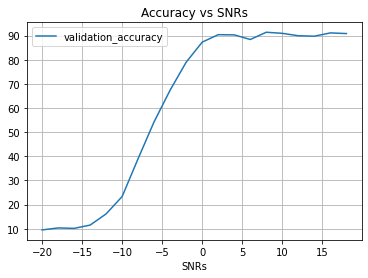

In [10]:
# new scrnn model evaluation
new_scrnn_model = utils.evaluate_model('/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/new_scrnn_models/','model_epoch-24_val_acc-0.61.h5',np.array(x_ts),np.array(y_ts),snr_ts)
print(new_scrnn_model)

In [0]:
feat_file='/content/gdrive/My Drive/EE5611_project_features/base_scrnn_features.h5'
fid=h5py.File(feat_file,'r');
x_tr = fid['x_tr']
y_tr = fid['y_tr']
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [14]:
model_dir = '/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/Baseline_SCRNN_tanh_models/'
m_baseline_scrnn_tanh = baseline_scrnn_tanh()
checkpoint = keras.callbacks.ModelCheckpoint(model_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)
history = m_baseline_scrnn_tanh.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=400,
       epochs=50,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 2)            8         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 124, 128)          1408      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 41, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
lstm_3 (LSTM)                (None, 37, 128)           131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 128)           0   

Baseline scrnn tanh


acc_baseline_scrnn_tanh
 [0.37645453, 0.48882827, 0.5234646, 0.54550505, 0.5556667, 0.56144947, 0.5664899, 0.57158583, 0.5750808, 0.58046967, 0.58774745, 0.5955606, 0.6026667, 0.60855556, 0.61267173, 0.6170101, 0.62144446, 0.62408084, 0.6264596, 0.6308788, 0.6336465, 0.6366717, 0.6400909, 0.6431515, 0.6464949, 0.6490151, 0.6517677, 0.65566164, 0.6579747, 0.6625505, 0.6650303, 0.6678333, 0.6710656, 0.67415655, 0.67784345, 0.6812828, 0.6829091, 0.6862121, 0.690399, 0.6927121, 0.6962778, 0.69856566, 0.7007475, 0.70361114, 0.70584345, 0.7096818, 0.71195453, 0.71488386, 0.7178182, 0.7204394]
val_acc_baseline_scrnn_tanh
 [0.2614545524120331, 0.5187727212905884, 0.5454545617103577, 0.5569999814033508, 0.5652272701263428, 0.5645909309387207, 0.5639545321464539, 0.5724999904632568, 0.5830909013748169, 0.5802727341651917, 0.5910909175872803, 0.5985000133514404, 0.6008636355400085, 0.6082727313041687, 0.6100909113883972, 0.6134091019630432, 0.6132272481918335, 0.612727284431

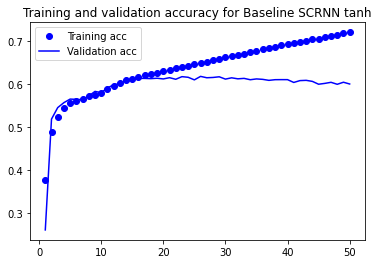

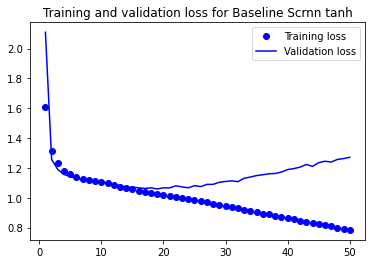

In [16]:
acc_baseline_scrnn_tanh = history.history['accuracy']
val_acc_baseline_scrnn_tanh = history.history['val_accuracy']
loss_baseline_scrnn_tanh = history.history['loss']
val_loss_baseline_scrnn_tanh = history.history['val_loss']
epochs = range(1, len(acc_baseline_scrnn_tanh) + 1)

print('===================================================')
print('Baseline scrnn tanh\n\n')
print('acc_baseline_scrnn_tanh\n',acc_baseline_scrnn_tanh)
print('val_acc_baseline_scrnn_tanh\n',val_acc_baseline_scrnn_tanh)
print('loss_baseline_scrnn_tanh\n',loss_baseline_scrnn_tanh)
print('val_loss_baseline_scrnn_tanh\n',val_loss_baseline_scrnn_tanh)

plt.plot(epochs, acc_baseline_scrnn_tanh, 'bo', label='Training acc')
plt.plot(epochs, val_acc_baseline_scrnn_tanh, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Baseline SCRNN tanh')
plt.legend()
plt.figure()
plt.plot(epochs, loss_baseline_scrnn_tanh, 'bo', label='Training loss')
plt.plot(epochs, val_loss_baseline_scrnn_tanh, 'b', label='Validation loss')
plt.title('Training and validation loss for Baseline Scrnn tanh')
plt.legend()
plt.show()


SNR: -20dB, Validation Accuracy: 9.636363636363637


             Classification Report
              precision    recall  f1-score   support

           0       0.06      0.01      0.02       100
           1       0.00      0.00      0.00       100
           2       0.17      0.02      0.04       100
           3       0.12      0.02      0.03       100
           4       0.20      0.01      0.02       100
           5       0.33      0.01      0.02       100
           6       0.10      0.96      0.17       100
           7       0.07      0.01      0.02       100
           8       0.11      0.01      0.02       100
           9       0.25      0.01      0.02       100
          10       0.00      0.00      0.00       100

    accuracy                           0.10      1100
   macro avg       0.13      0.10      0.03      1100
weighted avg       0.13      0.10      0.03      1100


             Confusion Matrix
[[ 1  2  1  1  0  0 90  5  0  0  0]
 [ 3  0  0  0  0  0 96  0  0  0

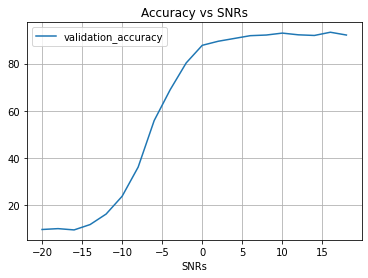

In [17]:
# baseline scrnn tanh model evaluation
baseline_scrnn_tanh_model = utils.evaluate_model('/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/Baseline_SCRNN_tanh_models/','model_epoch-26_val_acc-0.62.h5',np.array(x_ts),np.array(y_ts),snr_ts)
print(baseline_scrnn_tanh_model)